In [20]:
import pandas as pd
import numpy as np
import gensim.downloader as api
import seaborn as sns
from tqdm.notebook import tqdm

In [21]:
glove_model = api.load('glove-wiki-gigaword-300')
w2v_model = api.load('word2vec-google-news-300')
word_list = '/Users/jessica_1/Workspace/Wordle_project/wordle-nyt-answers-alphabetical.txt'

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Function to compute distance between two words using GloVe
def glove_distance(word1, word2, model):
    if word1 in model and word2 in model:
        vec1 = model[word1]
        vec2 = model[word2]
        
        # Calculate Cosine Similarity
        similarity = cosine_similarity(vec1, vec2)
        distance = 1 - similarity  # Cosine distance

        return similarity, distance  # Return if both words are found
    else:
        # Return None for similarity and distance if words are not found
        return None, None

In [22]:
word_list = '/Users/jessica_1/Workspace/Wordle_project/wordle-nyt-answers-alphabetical.txt'

with open(word_list, 'r') as f:
    words = f.read().splitlines()

test_words = words

df_results = pd.DataFrame(columns=['Word1', 'Word2', 'Similarity', 'Distance'])

total_comparisons = (len(test_words) * (len(test_words) - 1)) // 2  # Total number of comparisons
progress_bar = tqdm(total=total_comparisons, desc="Comparing words", unit="comparison", leave=True, mininterval=0.1, ncols=100)

for i in range(len(test_words)):
    for j in range(i + 1, len(test_words)):  
        word1 = test_words[i]
        word2 = test_words[j]
        similarity, distance = glove_distance(word1, word2, glove_model)

        if similarity is not None: 
            new_row = pd.DataFrame({
                'Word1': [word1],
                'Word2': [word2],
                'Similarity': [similarity],
                'Distance': [distance]
            })
            # Use pd.concat() to append the new row to df_results
            df_results = pd.concat([df_results, new_row], ignore_index=True)
        else:
            print(f"One or both words ('{word1}', '{word2}') not found in the GloVe model.")

        progress_bar.update(1)  # Update progress bar after each comparison

progress_bar.close()  # Close the progress bar when done

Comparing words:   0%|                                          | 0/2664586 [00:00<?, ?comparison/s]

One or both words ('aback', 'abase') not found in the GloVe model.
One or both words ('aback', 'elate') not found in the GloVe model.
One or both words ('aback', 'gayly') not found in the GloVe model.


/var/folders/y2/255cmf8x457_1wfw5bhh8cwm0000gp/T/ipykernel_46194/4119991068.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_row], ignore_index=True)


One or both words ('aback', 'plier') not found in the GloVe model.
One or both words ('aback', 'wooer') not found in the GloVe model.
One or both words ('abase', 'abate') not found in the GloVe model.
One or both words ('abase', 'abbey') not found in the GloVe model.
One or both words ('abase', 'abbot') not found in the GloVe model.
One or both words ('abase', 'abhor') not found in the GloVe model.
One or both words ('abase', 'abide') not found in the GloVe model.
One or both words ('abase', 'abled') not found in the GloVe model.
One or both words ('abase', 'abode') not found in the GloVe model.
One or both words ('abase', 'abort') not found in the GloVe model.
One or both words ('abase', 'about') not found in the GloVe model.
One or both words ('abase', 'above') not found in the GloVe model.
One or both words ('abase', 'abuse') not found in the GloVe model.
One or both words ('abase', 'abyss') not found in the GloVe model.
One or both words ('abase', 'acorn') not found in the GloVe mo

In [23]:
glove_avg_similarity = df_results['Similarity'].mean()
glove_std_similarity = df_results['Similarity'].std()

glove_avg_distance = df_results['Distance'].mean()
glove_std_distance = df_results['Distance'].std()

print(f"output dataframe: {df_results.shape}")
print(f"total possible combination of words: {total_comparisons}")
print(f"number of available pairs: {df_results.shape[0]}")
print(f"glove average similarity: {glove_avg_similarity}")
print(f"glove similarity std dev: {glove_std_similarity}")

print(f"glove average distance: {glove_avg_distance}")
print(f"glove distance std dev: {glove_std_distance}")

# Display the DataFrame to verify
print(df_results.head())

output dataframe: (2653056, 4)
total possible combination of words: 2664586
number of available pairs: 2653056
glove average similarity: 0.028719307854771614
glove similarity std dev: 0.09873958677053452
glove average distance: 0.9712806795834766
glove distance std dev: 0.09885322020636385
   Word1  Word2  Similarity  Distance
0  aback  abate    0.122736  0.877264
1  aback  abbey    0.047598  0.952402
2  aback  abbot    0.122756  0.877244
3  aback  abhor    0.092040  0.907960
4  aback  abide    0.023044  0.976956


In [29]:
import matplotlib.pyplot as plt


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


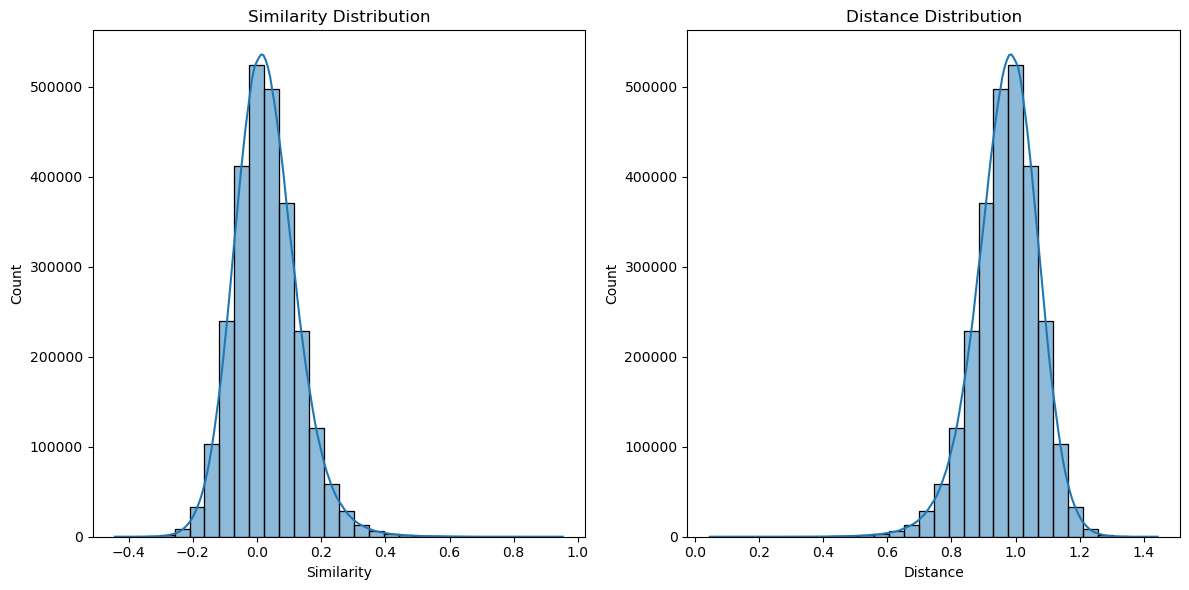

In [30]:
plt.figure(figsize=(12, 6))

# Plot the similarity distribution
plt.subplot(1, 2, 1)  # Create subplots
sns.histplot(df_results['Similarity'], kde=True, bins=30)
plt.title('Similarity Distribution')
plt.xlabel('Similarity')
plt.ylabel('Count')

# Plot the distance distribution
plt.subplot(1, 2, 2)
sns.histplot(df_results['Distance'], kde=True, bins=30)
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()  # Adjusts layout to prevent overlapping
plt.show()

In [24]:
glove_model = api.load('glove-wiki-gigaword-300')
w2v_model = api.load('word2vec-google-news-300')
word_list = '/Users/jessica_1/Workspace/Wordle_project/wordle-nyt-answers-alphabetical.txt'

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Function to compute distance between two words using GloVe
def word2vec_distance(word1, word2, model):
    if word1 in model and word2 in model:
        vec1 = model[word1]
        vec2 = model[word2]
        
        # Calculate Cosine Similarity
        similarity = cosine_similarity(vec1, vec2)
        distance = 1 - similarity  # Cosine distance
        
        return similarity, distance
    else:
        return None, None 

---

In [27]:
word_list = '/Users/jessica_1/Workspace/Wordle_project/wordle-nyt-answers-alphabetical.txt'

with open(word_list, 'r') as f:
    words = f.read().splitlines()

test_words = words

w2v_results = pd.DataFrame(columns=['Word1', 'Word2', 'Similarity', 'Distance'])

total_comparisons = (len(test_words) * (len(test_words) - 1)) // 2  # Total number of comparisons
progress_bar = tqdm(total=total_comparisons, desc="Comparing words", unit="comparison", leave=True, mininterval=0.1, ncols=100)

for i in range(len(test_words)):
    for j in range(i + 1, len(test_words)):  
        word1 = test_words[i]
        word2 = test_words[j]
        similarity, distance = glove_distance(word1, word2, w2v_model)

        if similarity is not None: 
            new_row = pd.DataFrame({
                'Word1': [word1],
                'Word2': [word2],
                'Similarity': [similarity],
                'Distance': [distance]
            })
            # Use pd.concat() to append the new row to w2v_results
            w2v_results = pd.concat([w2v_results, new_row], ignore_index=True)
        else:
            print(f"One or both words ('{word1}', '{word2}') not found in the w2v model.")

        progress_bar.update(1)  # Update progress bar after each comparison

progress_bar.close()  # Close the progress bar when done

Comparing words:   0%|                                          | 0/2664586 [00:00<?, ?comparison/s]

/var/folders/y2/255cmf8x457_1wfw5bhh8cwm0000gp/T/ipykernel_46194/3106429060.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  w2v_results = pd.concat([w2v_results, new_row], ignore_index=True)


One or both words ('aback', 'nosey') not found in the GloVe model.
One or both words ('aback', 'parer') not found in the GloVe model.
One or both words ('aback', 'spelt') not found in the GloVe model.
One or both words ('aback', 'spilt') not found in the GloVe model.
One or both words ('abase', 'nosey') not found in the GloVe model.
One or both words ('abase', 'parer') not found in the GloVe model.
One or both words ('abase', 'spelt') not found in the GloVe model.
One or both words ('abase', 'spilt') not found in the GloVe model.
One or both words ('abate', 'nosey') not found in the GloVe model.
One or both words ('abate', 'parer') not found in the GloVe model.
One or both words ('abate', 'spelt') not found in the GloVe model.
One or both words ('abate', 'spilt') not found in the GloVe model.
One or both words ('abbey', 'nosey') not found in the GloVe model.
One or both words ('abbey', 'parer') not found in the GloVe model.
One or both words ('abbey', 'spelt') not found in the GloVe mo

In [28]:
w2v_avg_similarity = w2v_results['Similarity'].mean()
w2v_std_similarity = w2v_results['Similarity'].std()

w2v_avg_distance = w2v_results['Distance'].mean()
w2v_std_distance = w2v_results['Distance'].std()

print(f"output dataframe: {w2v_results.shape}")
print(f"total possible combination of words: {total_comparisons}")
print(f"number of available pairs: {w2v_results.shape[0]}")
print(f"w2v average similarity: {w2v_avg_similarity}")
print(f"w2v similarity std dev: {w2v_std_similarity}")

print(f"w2v average distance: {w2v_avg_distance}")
print(f"w2v distance std dev: {w2v_std_distance}")

# Display the DataFrame to verify
print(w2v_results.head())

output dataframe: (2655360, 4)
total possible combination of words: 2664586
number of available pairs: 2655360
w2v average similarity: 0.08578217774629593
w2v similarity std dev: 0.0816916674375534
w2v average distance: 0.9142178354904698
w2v distance std dev: 0.0817817798619878
   Word1  Word2  Similarity  Distance
0  aback  abase    0.109168  0.890832
1  aback  abate    0.140500  0.859500
2  aback  abbey    0.086419  0.913581
3  aback  abbot    0.077235  0.922765
4  aback  abhor    0.238970  0.761030


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


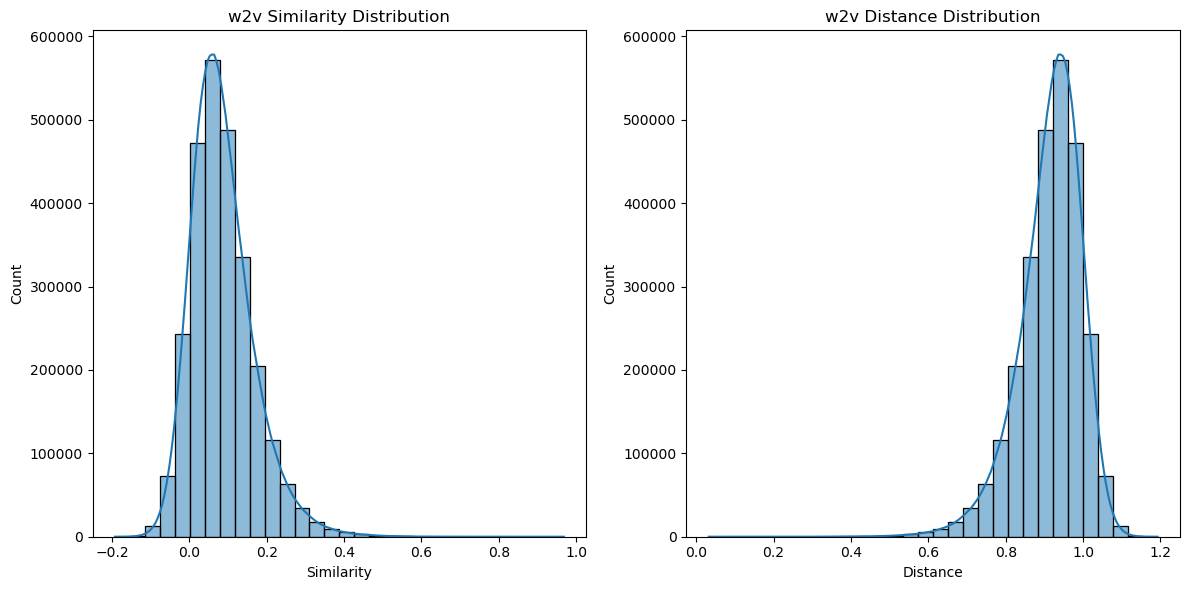

In [31]:
plt.figure(figsize=(12, 6))

# Plot the similarity distribution
plt.subplot(1, 2, 1)  # Create subplots
sns.histplot(w2v_results['Similarity'], kde=True, bins=30)
plt.title('w2v Similarity Distribution')
plt.xlabel('Similarity')
plt.ylabel('Count')

# Plot the distance distribution
plt.subplot(1, 2, 2)
sns.histplot(w2v_results['Distance'], kde=True, bins=30)
plt.title('w2v Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()  # Adjusts layout to prevent overlapping
plt.show()

In [32]:
df_results.to_pickle('/Users/jessica_1/Workspace/Wordle_project/glove_distance_similarity.pkl')
w2v_results.to_pickle('/Users/jessica_1/Workspace/Wordle_project/w2v_distance_similarity.pkl')


In [33]:
test_w2v = pd.read_pickle('/Users/jessica_1/Workspace/Wordle_project/w2v_distance_similarity.pkl')
test_glove = pd.read_pickle('/Users/jessica_1/Workspace/Wordle_project/glove_distance_similarity.pkl')

In [34]:
print(test_w2v.head())
print(test_glove.head())


   Word1  Word2  Similarity  Distance
0  aback  abase    0.109168  0.890832
1  aback  abate    0.140500  0.859500
2  aback  abbey    0.086419  0.913581
3  aback  abbot    0.077235  0.922765
4  aback  abhor    0.238970  0.761030
   Word1  Word2  Similarity  Distance
0  aback  abate    0.122736  0.877264
1  aback  abbey    0.047598  0.952402
2  aback  abbot    0.122756  0.877244
3  aback  abhor    0.092040  0.907960
4  aback  abide    0.023044  0.976956
